In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

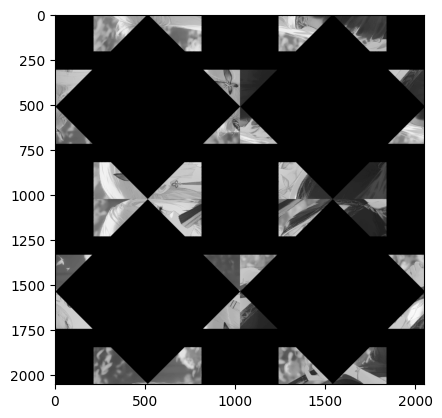

In [8]:
img = plt.imread('Res/senheScramble.jpg')
plt.imshow(img, cmap='gray')

In [35]:
height, width = img.shape

print(height, width)

2052 2052


In [34]:
def findCut(img,x1,x2,y1,y2):
    hasil = np.zeros((x2-x1,y2-y1)).astype(int)
    for i in range(x1,x2):
        for j in range(y1,y2):
            hasil[i-x1,j-y1] = img[i,j]
    return hasil

In [50]:
top_left = img[:height//2, :width//2]
top_right = img[:height//2, width//2:]
bottom_left = img[height//2:, :width//2]
bottom_right = img[height//2:, width//2:]

In [ ]:
plt.imshow(top_left, cmap='gray')
plt.imshow(top_right, cmap='gray')
plt.imshow(bottom_left, cmap='gray')
plt.imshow(bottom_right, cmap='gray')

Text(0.5, 1.0, 'Bottom Right')

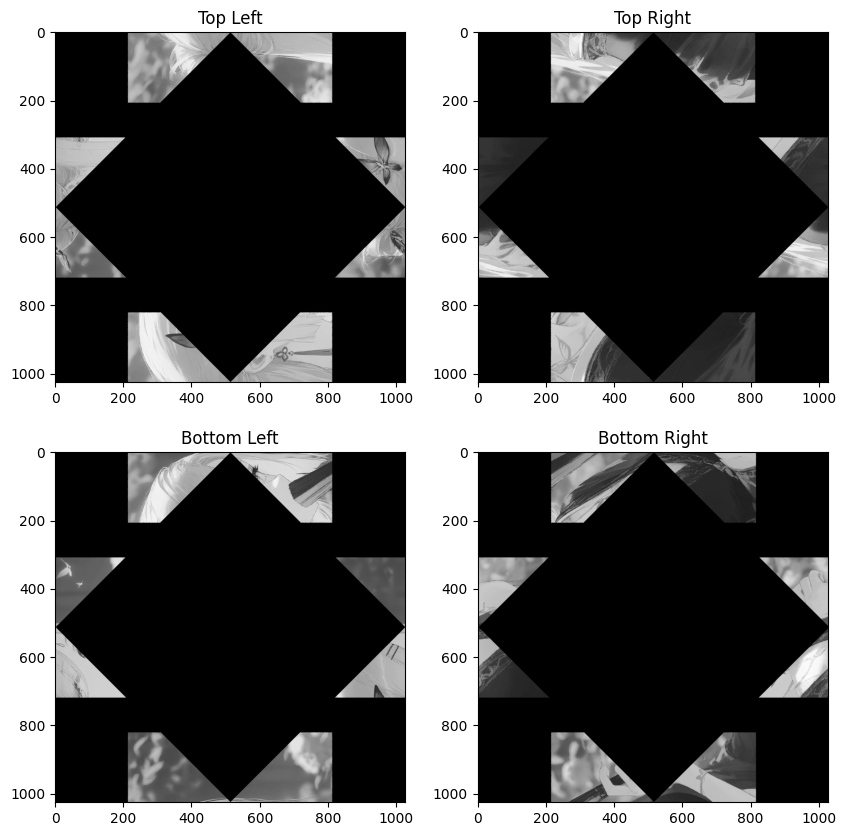

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(top_left, cmap='gray')
axes[0, 0].set_title('Top Left')
axes[0, 1].imshow(top_right, cmap='gray')
axes[0, 1].set_title('Top Right')
axes[1, 0].imshow(bottom_left, cmap='gray')
axes[1, 0].set_title('Bottom Left')
axes[1, 1].imshow(bottom_right, cmap='gray')
axes[1, 1].set_title('Bottom Right')